In [1]:
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[["calories","sodium","alcohol","cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [7]:
beer.iloc[:,1:5]

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [9]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2],
      dtype=int32)

In [11]:
beer['cluster3'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster3')

,name,calories,sodium,alcohol,cost,cluster3,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
10,Coors,140,18,4.6,0.44,0,1


In [12]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

cluster_centers = km.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

In [13]:
beer.groupby('cluster3').mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,70.00,10.5,2.600000,0.420000,0
2,102.75,10.0,4.075000,0.440000,0


In [14]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.666667
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [16]:
centers = beer.groupby("cluster3").mean().reset_index()

In [17]:
centers

,cluster3,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,1
1,1,70.00,10.5,2.600000,0.420000,0
2,2,102.75,10.0,4.075000,0.440000,0


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [19]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'Alcohol')

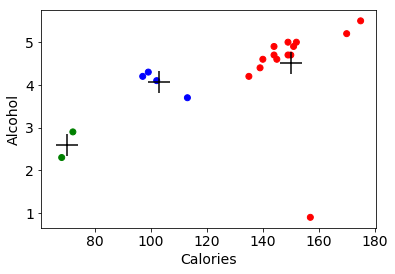

In [23]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster3"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=5, marker='+', s=500, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'With 3 centroids initialized')

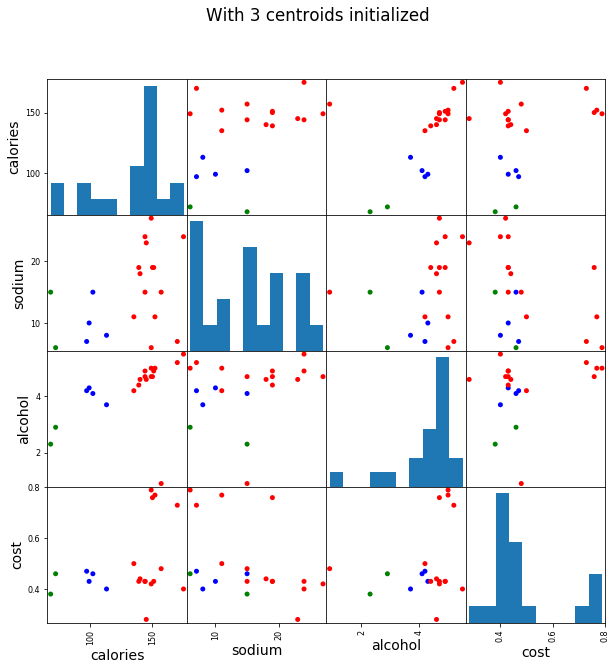

In [25]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'With 2 centroids initialized')

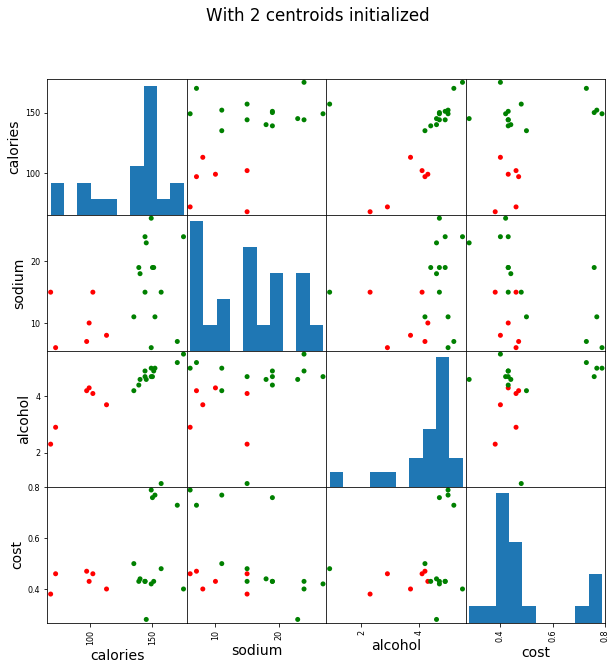

In [26]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

In [27]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [28]:
km_scaled = KMeans(n_clusters=3).fit(X_scaled)
beer['cluster_scaled'] = km.labels_
beer.sort_values('cluster_scaled')

,name,calories,sodium,alcohol,cost,cluster3,cluster2,cluster_scaled
0,Budweiser,144,15,4.7,0.43,0,1,0
1,Schlitz,151,19,4.9,0.43,0,1,0
2,Lowenbrau,157,15,0.9,0.48,0,1,0
3,Kronenbourg,170,7,5.2,0.73,0,1,0
4,Heineken,152,11,5.0,0.77,0,1,0
5,Old_Milwaukee,145,23,4.6,0.28,0,1,0
6,Augsberger,175,24,5.5,0.40,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0
10,Coors,140,18,4.6,0.44,0,1,0


In [30]:
beer.groupby("cluster_scaled").mean()

,calories,sodium,alcohol,cost,cluster3,cluster2
cluster_scaled,,,,,,
0,150.00,17.0,4.521429,0.520714,0,1
1,70.00,10.5,2.600000,0.420000,1,0
2,102.75,10.0,4.075000,0.440000,2,0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9eff65e48>,
      dtype=object)

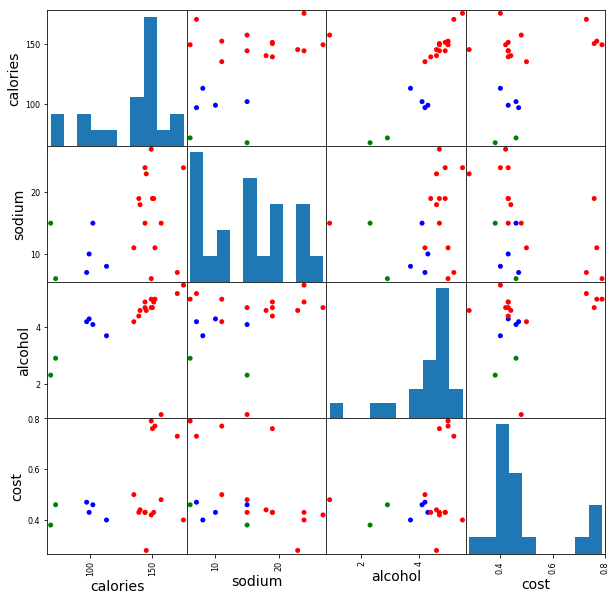

In [31]:
pd.scatter_matrix(X, c=colors[beer.cluster_scaled], alpha=1, figsize=(10,10), s=100)

In [35]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X_scaled,beer.cluster_scaled)
score = metrics.silhouette_score(X,beer.cluster3)
print(score_scaled, score)

0.19454664171120423 0.6731775046455796


In [36]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.4081599013899603,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [39]:
beer['cluster_db'] = db.labels_
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster3,cluster2,cluster_scaled,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,2,0,2,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,0,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,0,0
13,Becks,150,19,4.7,0.76,0,1,0,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0


In [40]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster3,cluster2,cluster_scaled
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.666667,0.666667
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.000000
1,99.333333,10.666667,4.200000,0.453333,2.000000,0.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,1.000000,0.000000,1.000000


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9efd00ac8>,
      dtype=object)

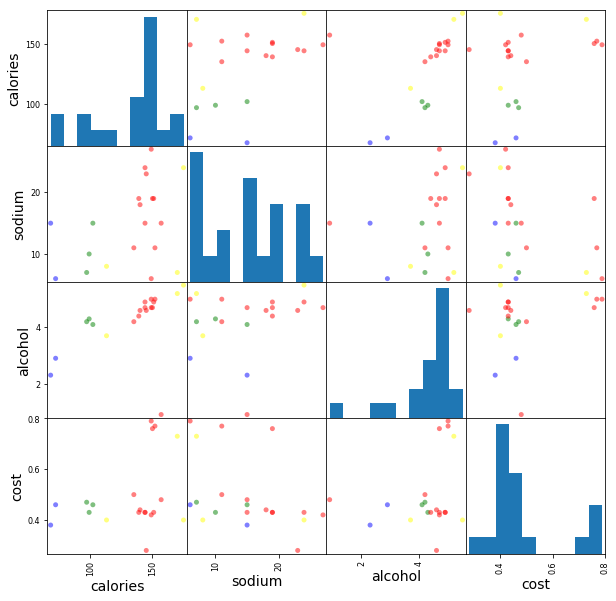

In [41]:
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)

In [42]:
colors

array(['red', 'green', 'blue', 'yellow'], dtype='<U6')